In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data

In [2]:
#load data from files
train_frame,train_labels_frame,test_frame=data.loadFrame()

# train_frame

In [3]:
#over look
train_frame.head(10)

,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,170000,NaN,3089,2798058,293,1,1
1,170000,NaN,1259,463234,6161,1,2
2,170000,NaN,4465,1857485,7434,4,1
3,170000,NaN,1004,2038823,977,1,1
4,170000,NaN,1887,2015141,3688,1,1
5,170000,NaN,3293,1177829,3347,1,1
6,170000,NaN,4793,1257450,1876,1,2
7,170000,NaN,1456,764204,6086,1,3
8,170000,NaN,4465,1438585,2426,2,3
9,170000,NaN,985,1750317,5414,1,3


In [4]:
#shape of train_frame
train_frame.shape

(3749528, 7)

# test_frame

In [5]:
#over look
test_frame.head(10)

,instanceID,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,1,310000,3745,1164848,3451,1,3
1,2,310000,2284,2127247,1613,1,3
2,3,310000,1456,2769125,5510,2,1
3,4,310000,4565,9762,4113,2,3
4,5,310000,49,2513636,3615,1,3
5,6,310000,3824,488035,3821,1,1
6,7,310000,863,225561,4188,1,3
7,8,310000,4469,1144620,4113,1,1
8,9,310000,3745,1113275,3347,1,2
9,10,310000,4565,1361729,2426,2,2


In [6]:
#shape 
test_frame.shape

(338489, 7)

# user_frame

### 用户基础特征文件(user.csv)
>每行代表一个用户，各字段之间由逗号分隔，顺序依次为：“userID，age，gender，education，marriageStatus，haveBaby，hometown，residence”。

**用户ID(userID)**	唯一标识一个用户

**年龄(age)**	取值范围[0, 80]，其中0表示未知。

**性别(gender)**	取值包括男，女，未知。

**学历(education)**	用户当前最高学历，不区分在读生和毕业生，取值包括小学，初中，高中，专科，本科，硕士，博士，未知

**婚恋状态(marriageStatus)**	用户当前感情状况，取值包括单身，新婚，已婚，未知。

**育儿状态(haveBaby)	** 用户当前孕育宝宝状态，取值包括孕育中，宝宝0~6个月，宝宝6~12个月，宝宝1~2岁，宝宝2~3岁，育儿但宝宝年龄未知，未知。

**家乡/籍贯(hometown)**	用户出生地，取值具体到市级城市，使用二级编码，千位百位数表示省份，十位个位数表示省内城市，如1806表示省份编号为18，城市编号是省内的6号，编号0表示未知。

**常住地(residence)**	最近一段时间用户长期居住的地方，取值具体到市级城市，编码方式与家乡相同。

**App安装列表(appInstallList)**	截止到某一时间点用户全部的App安装列表(appID)，已过滤高频和低频App。

**App安装流水** 最近一段时间内用户安装App行为流水，包括appID，行为发生时间(installTime)和app类别(appCategory)，已过滤高频和低频App。

注：2~8基于用户个人注册资料和算法自动修正得到，9~10基于用户行为日志统计得到。

In [7]:
#load data
user_frame=data.loadUserFrame()

In [8]:
#over look
user_frame.head(10)

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,1,42,1,0,2,0,512,503
1,2,18,1,5,1,0,1403,1403
2,3,0,2,4,0,0,0,0
3,4,21,2,5,3,0,607,607
4,5,22,2,0,0,0,0,1301
5,6,20,2,0,0,0,301,2301
6,7,17,1,5,0,0,313,313
7,8,21,1,2,3,1,1607,1607
8,9,38,2,2,2,0,2203,2203
9,10,13,2,0,0,0,0,2203


In [9]:
#shape 
user_frame.shape

(2805118, 8)

# ad_frame


**账户ID(advertiserID)**	腾讯社交广告的账户结构分为四级：账户——推广计划——广告——素材，账户对应一家特定的广告主。

**推广计划ID(campaignID)**	推广计划是广告的集合，类似电脑文件夹功能。广告主可以将推广平台、预算限额、是否匀速投放等条件相同的广告放在同一个推广计划中，方便管理。

**广告ID(adID)**	腾讯社交广告管理平台中的广告是指广告主创建的广告创意(或称广告素材)及广告展示相关设置，包含广告的基本信息(广告名称，投放时间等)，广告的推广目标，投放平台，投放的广告规格，所投放的广告创意，广告的受众(即广告的定向设置)，广告出价等信息。单个推广计划下的广告数不设上限。

**素材ID(creativeID)**	展示给用户直接看到的广告内容，一条广告下可以有多组素材。

**AppID(appID)**	广告推广的目标页面链接地址，即点击后想要展示给用户的页面，此处页面特指具体的App。多个推广计划或广告可以同时推广同一个App。

**App分类(appCategory)**	App开发者设定的App类目标签，类目标签有两层，使用3位数字编码，百位数表示一级类目，十位个位数表示二级类目，如“210”表示一级类目编号为2，二级类目编号为10，类目未知或者无法获取时，标记为0。

**App平台(appPlatform)**	App所属操作系统平台，取值为Android，iOS，未知。同一个appID只会属于一个平台。

In [10]:
#load data
ad_frame=data.loadAdFrame()

In [11]:
#over look
ad_frame.head(10)

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1
5,6440,3379,411,3,465,1
6,2367,364,139,10,434,1
7,4686,834,107,80,14,2
8,2553,2519,60,3,465,1
9,5832,100,73,54,389,1


In [12]:
#shape
ad_frame.shape

(6582, 6)

# position_frame

In [13]:
#load data
position_frame=data.loadPositionFrame()

In [14]:
#look over
position_frame.head(10)

,positionID,sitesetID,positionType
0,2150,1,0
1,2579,1,0
2,3322,1,0
3,5726,1,0
4,4522,2,0
5,3498,0,1
6,4818,0,1
7,6161,0,1
8,3347,0,1
9,2078,0,2


In [15]:
#shape
position_frame.shape

(7645, 3)

# app_categories_frame

In [16]:
#load data
app_categories_frame=data.loadAppCategoriesFrame()

In [17]:
#look over 
app_categories_frame.head(10)

,appID,appCategory
0,14,2
1,25,203
2,68,104
3,75,402
4,83,203
5,84,402
6,88,203
7,100,301
8,105,301
9,109,407


In [18]:
#shape
app_categories_frame.shape

(217041, 2)

# user_app_actions_frame

In [19]:
#load data
user_app_actions_frame=data.loadUserAppActionsFrame()

In [20]:
#look over 
user_app_actions_frame.head(10)

,userID,installTime,appID
0,1,182032,933
1,5,141354,589
2,5,251727,565
3,5,260932,596
4,5,261318,536
5,5,280755,6610
6,5,280801,723
7,5,280849,441
8,5,281545,403
9,5,281545,844


In [21]:
#shape
user_app_actions_frame.shape

(6003471, 3)

In [22]:
user_app_actions_frame[user_app_actions_frame["userID"]==678748]

,userID,installTime,appID
1443748,678748,160930,589


# user_installedapps_frame

In [23]:
user_installedapps_frame=data.loadUserInstalledAppsFrame()

In [24]:
#look over
user_installedapps_frame.head(10)

,userID,appID
0,1,357
1,1,360
2,1,362
3,1,365
4,1,375
5,1,441
6,1,480
7,1,481
8,1,482
9,1,483


In [25]:
#shape
user_installedapps_frame.shape

(84039009, 2)

In [26]:
user_installedapps_frame.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA15BB5320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EA001783C8>]], dtype=object)

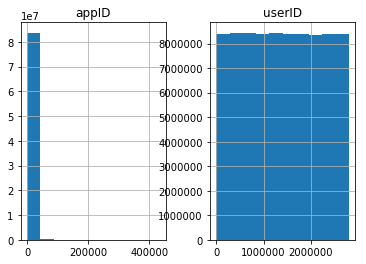

In [27]:
plt.show()

In [31]:
user_installedapps_frame["appID"].value_counts()

484       1361155
483       1361155
482       1361155
481       1361155
480       1361155
496       1234207
497       1234207
491       1231372
485       1231372
493       1231372
492       1231372
487       1231372
490       1231372
489       1231372
488       1231372
495       1231372
494       1231372
486       1231372
499        689978
498        663702
500        628252
503        580717
502        580717
501        580717
506        553934
505        553934
504        553934
508        538117
509        538117
507        538117
           ...   
96756           1
240974          1
279374          1
96757           1
213934          1
118796          1
53295           1
148367          1
175470          1
227765          1
148363          1
118786          1
227726          1
148362          1
118790          1
240962          1
148468          1
82837           1
249921          1
162223          1
53281           1
148470          1
293231          1
344936          1
175458    